# 1

# 2

# 3

# 4

# Momentum-Based/Trend-Following Strategies

## Rolling Window Mean Strategy

This strategy is to own a financial asset if its latest stock price is above the average price
over the last X days.
In the following example, it works well for Apple stock and a period of 90 days:

In [1]:
import pandas as pd
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)

In [2]:
import zipline.data.bundles as bdl
print(bdl.__path__)

['C:\\Users\\avi\\anaconda3\\envs\\env_zipline\\lib\\site-packages\\zipline\\data\\bundles']


In [3]:
%matplotlib inline

from zipline import run_algorithm 
from zipline.api import order_target_percent, symbol, set_commission
from zipline.finance.commission import PerTrade

import pyfolio as pf

import warnings
warnings.filterwarnings('ignore')

import numpy as np
np.NINF=  np.inf
pd.Series.iteritems = pd.Series.items
# pd.to_pydatetime = pd.to_datetime

def initialize(context): 
    context.stock = symbol('AAPL')
    context.rolling_window = 90
    set_commission(PerTrade(cost=5)) 


def handle_data(context, data): 
    price_hist = data.history(context.stock, "close", context.rolling_window, "1d")           
    order_target_percent(context.stock, 1.0 if price_hist[-1] > price_hist.mean() else 0.0) #only have capital_base and can buy accordingly ,
    #if price rises beyond mean we buy given the capital allows, esle sell

def analyze(context, perf): 
    returns, positions, transactions = pf.utils.extract_rets_pos_txn_from_zipline(perf) 
    pf.create_returns_tear_sheet(returns, benchmark_rets = None)
    
# start_date = pd.to_datetime('2000-1-1', utc=True)
# end_date = pd.to_datetime('2018-1-1', utc=True)
start_date = pd.Timestamp('2000-1-1')
end_date = pd.Timestamp('2018-1-1')

    
results = run_algorithm(start = start_date, end = end_date, initialize = initialize,  handle_data = handle_data, capital_base = 10000, data_frequency = 'daily', bundle ='quandl')


In [3]:
results['positions'][1],results['positions'][2] 

([{'sid': Equity(8 [AAPL]),
   'amount': 89,
   'cost_basis': 102.60742977528089,
   'last_sale_price': 102.5}],
 [{'sid': Equity(8 [AAPL]),
   'amount': 97,
   'cost_basis': 102.77811597938143,
   'last_sale_price': 104.0}])

In [4]:
results['transactions'][1],results['transactions'][2]  ,results['transactions'][3]

([{'amount': 89,
   'dt': Timestamp('2000-01-04 21:00:00+0000', tz='UTC'),
   'price': 102.55125,
   'order_id': '4fd18e4d6e584fb28de5e51256f84176',
   'sid': Equity(8 [AAPL]),
   'commission': None}],
 [{'amount': 8,
   'dt': Timestamp('2000-01-05 21:00:00+0000', tz='UTC'),
   'price': 104.052,
   'order_id': '8ca51f9a8b2d4be9b9dfa4c659f5ff93',
   'sid': Equity(8 [AAPL]),
   'commission': None}],
 [])

In [5]:
results[1:300] #if you remove analyze = analyze, in run_algorithm

period_open              period_close  \
2000-01-04 21:00:00+00:00 2000-01-04 14:31:00+00:00 2000-01-04 21:00:00+00:00   
2000-01-05 21:00:00+00:00 2000-01-05 14:31:00+00:00 2000-01-05 21:00:00+00:00   
2000-01-06 21:00:00+00:00 2000-01-06 14:31:00+00:00 2000-01-06 21:00:00+00:00   
2000-01-07 21:00:00+00:00 2000-01-07 14:31:00+00:00 2000-01-07 21:00:00+00:00   
2000-01-10 21:00:00+00:00 2000-01-10 14:31:00+00:00 2000-01-10 21:00:00+00:00   
2000-01-11 21:00:00+00:00 2000-01-11 14:31:00+00:00 2000-01-11 21:00:00+00:00   
2000-01-12 21:00:00+00:00 2000-01-12 14:31:00+00:00 2000-01-12 21:00:00+00:00   
2000-01-13 21:00:00+00:00 2000-01-13 14:31:00+00:00 2000-01-13 21:00:00+00:00   
2000-01-14 21:00:00+00:00 2000-01-14 14:31:00+00:00 2000-01-14 21:00:00+00:00   
2000-01-18 21:00:00+00:00 2000-01-18 14:31:00+00:00 2000-01-18 21:00:00+00:00   
2000-01-19 21:00:00+00:00 2000-01-19 14:31:00+00:00 2000-01-19 21:00:00+00:00   
2000-01-20 21:00:00+00:00 2000-01-20 14:31:00+00:00 2000-01-20 21:00:00+00:00   
2000-01-21 21:00:00+00:00 2000-01-21 14:31:00+00:00 2000-01-21 21:00:00+00:00   
2000-01-24 21:00:00+00:00 2000-01-24 14:31:00+00:00 2000-01-24 21:00:00+00:00   
2000-01-25 21:00:00+00:00 2000-01-25 14:31:00+00:00 2000-01-25 21:00:00+00:00   
2000-01-26 21:00:00+00:00 2000-01-26 14:31:00+00:00 2000-01-26 21:00:00+00:00   
2000-01-27 21:00:00+00:00 2000-01-27 14:31:00+00:00 2000-01-27 21:00:00+00:00   
2000-01-28 21:00:00+00:00 2000-01-28 14:31:00+00:00 2000-01-28 21:00:00+00:00   
2000-01-31 21:00:00+00:00 2000-01-31 14:31:00+00:00 2000-01-31 21:00:00+00:00   
2000-02-01 21:00:00+00:00 2000-02-01 14:31:00+00:00 2000-02-01 21:00:00+00:00   
2000-02-02 21:00:00+00:00 2000-02-02 14:31:00+00:00 2000-02-02 21:00:00+00:00   
2000-02-03 21:00:00+00:00 2000-02-03 14:31:00+00:00 2000-02-03 21:00:00+00:00   
2000-02-04 21:00:00+00:00 2000-02-04 14:31:00+00:00 2000-02-04 21:00:00+00:00   
2000-02-07 21:00:00+00:00 2000-02-07 14:31:00+00:00 2000-02-07 21:00:00+00:00   
2000-02-08 21:00:00+00:00 2000-02-08 14:31:00+00:00 2000-02-08 21:00:00+00:00   
2000-02-09 21:00:00+00:00 2000-02-09 14:31:00+00:00 2000-02-09 21:00:00+00:00   
2000-02-10 21:00:00+00:00 2000-02-10 14:31:00+00:00 2000-02-10 21:00:00+00:00   
2000-02-11 21:00:00+00:00 2000-02-11 14:31:00+00:00 2000-02-11 21:00:00+00:00   
2000-02-14 21:00:00+00:00 2000-02-14 14:31:00+00:00 2000-02-14 21:00:00+00:00   
2000-02-15 21:00:00+00:00 2000-02-15 14:31:00+00:00 2000-02-15 21:00:00+00:00   
2000-02-16 21:00:00+00:00 2000-02-16 14:31:00+00:00 2000-02-16 21:00:00+00:00   
2000-02-17 21:00:00+00:00 2000-02-17 14:31:00+00:00 2000-02-17 21:00:00+00:00   
2000-02-18 21:00:00+00:00 2000-02-18 14:31:00+00:00 2000-02-18 21:00:00+00:00   
2000-02-22 21:00:00+00:00 2000-02-22 14:31:00+00:00 2000-02-22 21:00:00+00:00   
2000-02-23 21:00:00+00:00 2000-02-23 14:31:00+00:00 2000-02-23 21:00:00+00:00   
2000-02-24 21:00:00+00:00 2000-02-24 14:31:00+00:00 2000-02-24 21:00:00+00:00   
2000-02-25 21:00:00+00:00 2000-02-25 14:31:00+00:00 2000-02-25 21:00:00+00:00   
2000-02-28 21:00:00+00:00 2000-02-28 14:31:00+00:00 2000-02-28 21:00:00+00:00   
2000-02-29 21:00:00+00:00 2000-02-29 14:31:00+00:00 2000-02-29 21:00:00+00:00   
2000-03-01 21:00:00+00:00 2000-03-01 14:31:00+00:00 2000-03-01 21:00:00+00:00   
2000-03-02 21:00:00+00:00 2000-03-02 14:31:00+00:00 2000-03-02 21:00:00+00:00   
2000-03-03 21:00:00+00:00 2000-03-03 14:31:00+00:00 2000-03-03 21:00:00+00:00   
2000-03-06 21:00:00+00:00 2000-03-06 14:31:00+00:00 2000-03-06 21:00:00+00:00   
2000-03-07 21:00:00+00:00 2000-03-07 14:31:00+00:00 2000-03-07 21:00:00+00:00   
2000-03-08 21:00:00+00:00 2000-03-08 14:31:00+00:00 2000-03-08 21:00:00+00:00   
2000-03-09 21:00:00+00:00 2000-03-09 14:31:00+00:00 2000-03-09 21:00:00+00:00   
2000-03-10 21:00:00+00:00 2000-03-10 14:31:00+00:00 2000-03-10 21:00:00+00:00   
2000-03-13 21:00:00+00:00 2000-03-13 14:31:00+00:00 2000-03-13 21:00:00+00:00   
2000-03-14 21:00:00+00:00 2000-03-14 14:31:00+00:00 2000-03-14 21:00:00

In [8]:
results.to_csv('Rolling_window_mean_strategy.xlsx')


In [9]:
import os
os.getcwd()

'C:\\Users\\avi\\Possible_Project\\Hands_on_Python_for_Trading\\Hands-On-Financial-Trading-with-Python\\Chapter09'

In [37]:
results['transactions'][1:300]

2000-01-04 21:00:00+00:00    [{'amount': 89, 'dt': 2000-01-04 21:00:00+00:0...
2000-01-05 21:00:00+00:00    [{'amount': 8, 'dt': 2000-01-05 21:00:00+00:00...
2000-01-06 21:00:00+00:00                                                   []
2000-01-07 21:00:00+00:00                                                   []
2000-01-10 21:00:00+00:00                                                   []
2000-01-11 21:00:00+00:00                                                   []
2000-01-12 21:00:00+00:00                                                   []
2000-01-13 21:00:00+00:00                                                   []
2000-01-14 21:00:00+00:00                                                   []
2000-01-18 21:00:00+00:00                                                   []
2000-01-19 21:00:00+00:00                                                   []
2000-01-20 21:00:00+00:00                                                   []
2000-01-21 21:00:00+00:00                           

## Simple Moving Averages Strategy

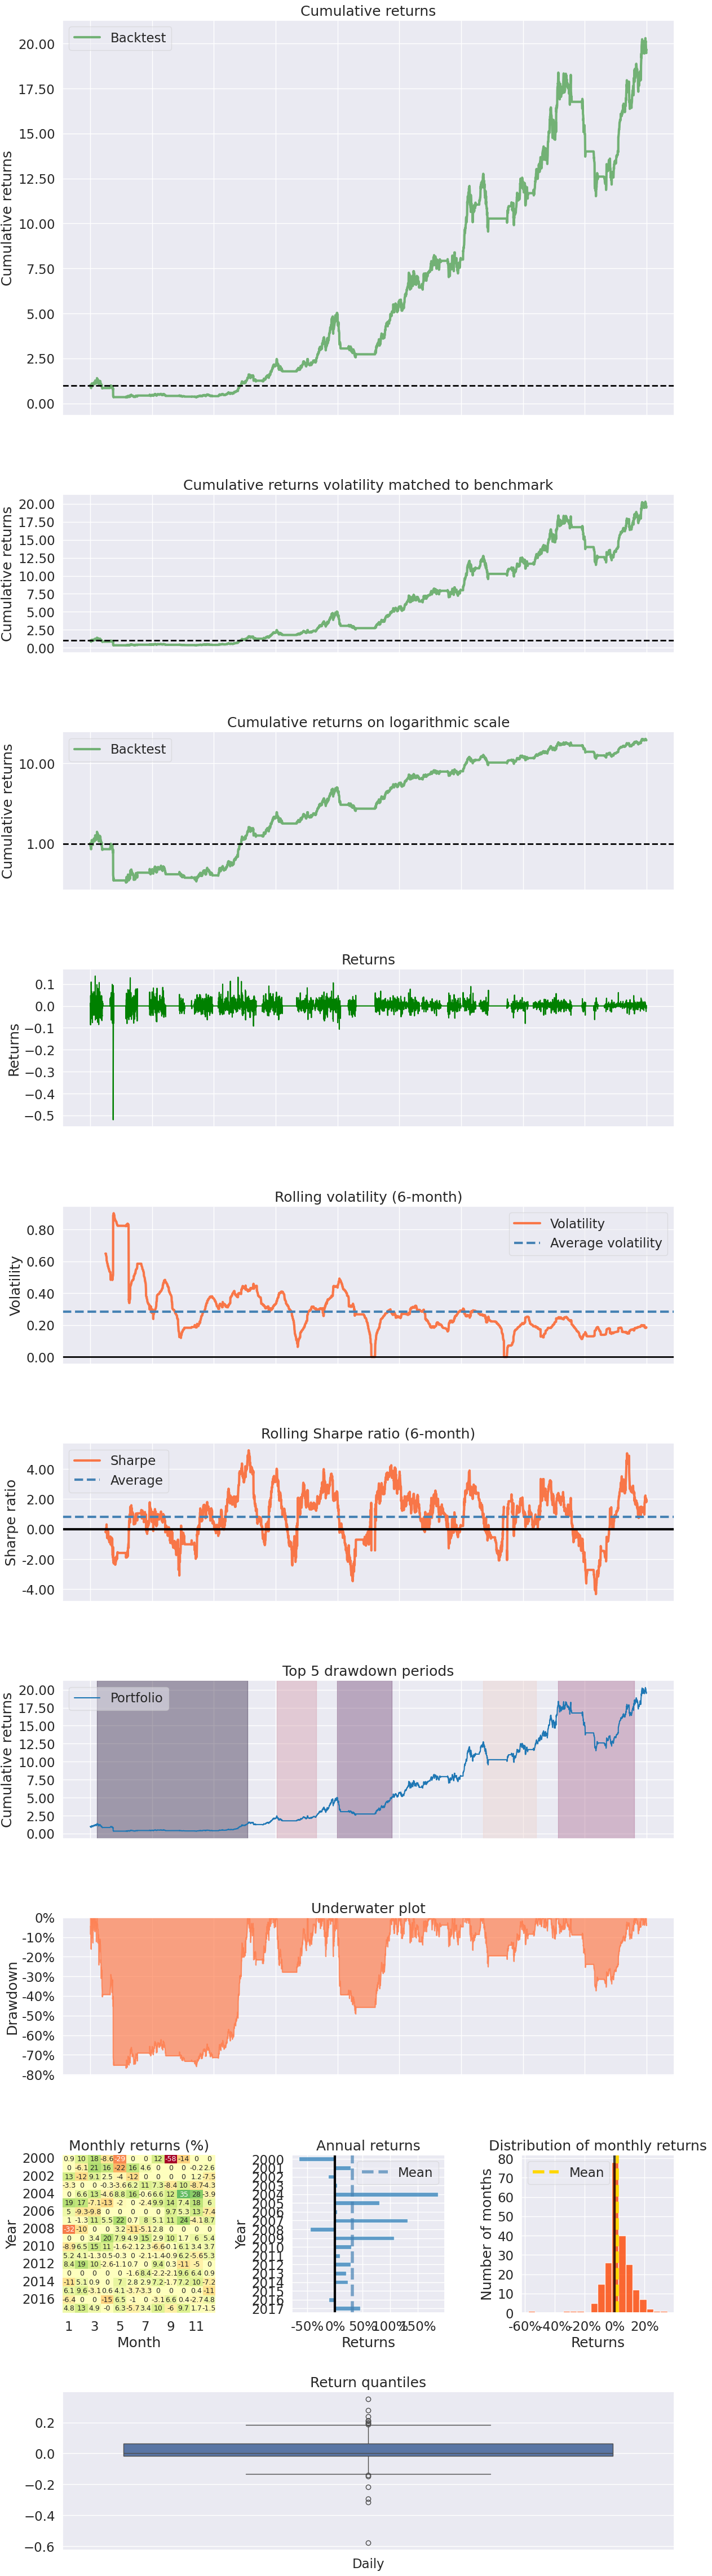

In [8]:
%matplotlib inline

from zipline import run_algorithm 
from zipline.api import order_target_percent, symbol, set_commission
from zipline.finance.commission import PerTrade
import pandas as pd
import pyfolio as pf

import warnings
warnings.filterwarnings('ignore')

def initialize(context): 
    context.stock = symbol('AAPL')
    context.rolling_window = 90 
    set_commission(PerTrade(cost=5))     

def handle_data(context, data): 
    price_hist = data.history(context.stock, "close", context.rolling_window, "1d")          
    
    rolling_mean_short_term = price_hist.rolling(window=45, center=False).mean()
    rolling_mean_long_term = price_hist.rolling(window=90, center=False).mean()
    
    if rolling_mean_short_term[-1] > rolling_mean_long_term[-1]:
        order_target_percent(context.stock, 1.0)     
    elif rolling_mean_short_term[-1] < rolling_mean_long_term[-1]:
        order_target_percent(context.stock, 0.0)     

def analyze(context, perf): 
    returns, positions, transactions = pf.utils.extract_rets_pos_txn_from_zipline(perf) 
    pf.create_returns_tear_sheet(returns, benchmark_rets = None)
    
# start_date = pd.to_datetime('2000-1-1', utc=True)
# end_date = pd.to_datetime('2018-1-1', utc=True)
start_date = pd.Timestamp('2000-1-1')
end_date = pd.Timestamp('2018-1-1')
    
results = run_algorithm(start = start_date, end = end_date, initialize = initialize, analyze = analyze, handle_data = handle_data, capital_base = 10000, data_frequency = 'daily', bundle ='quandl')

## Exponentially-Weighted Moving Averages Strategy

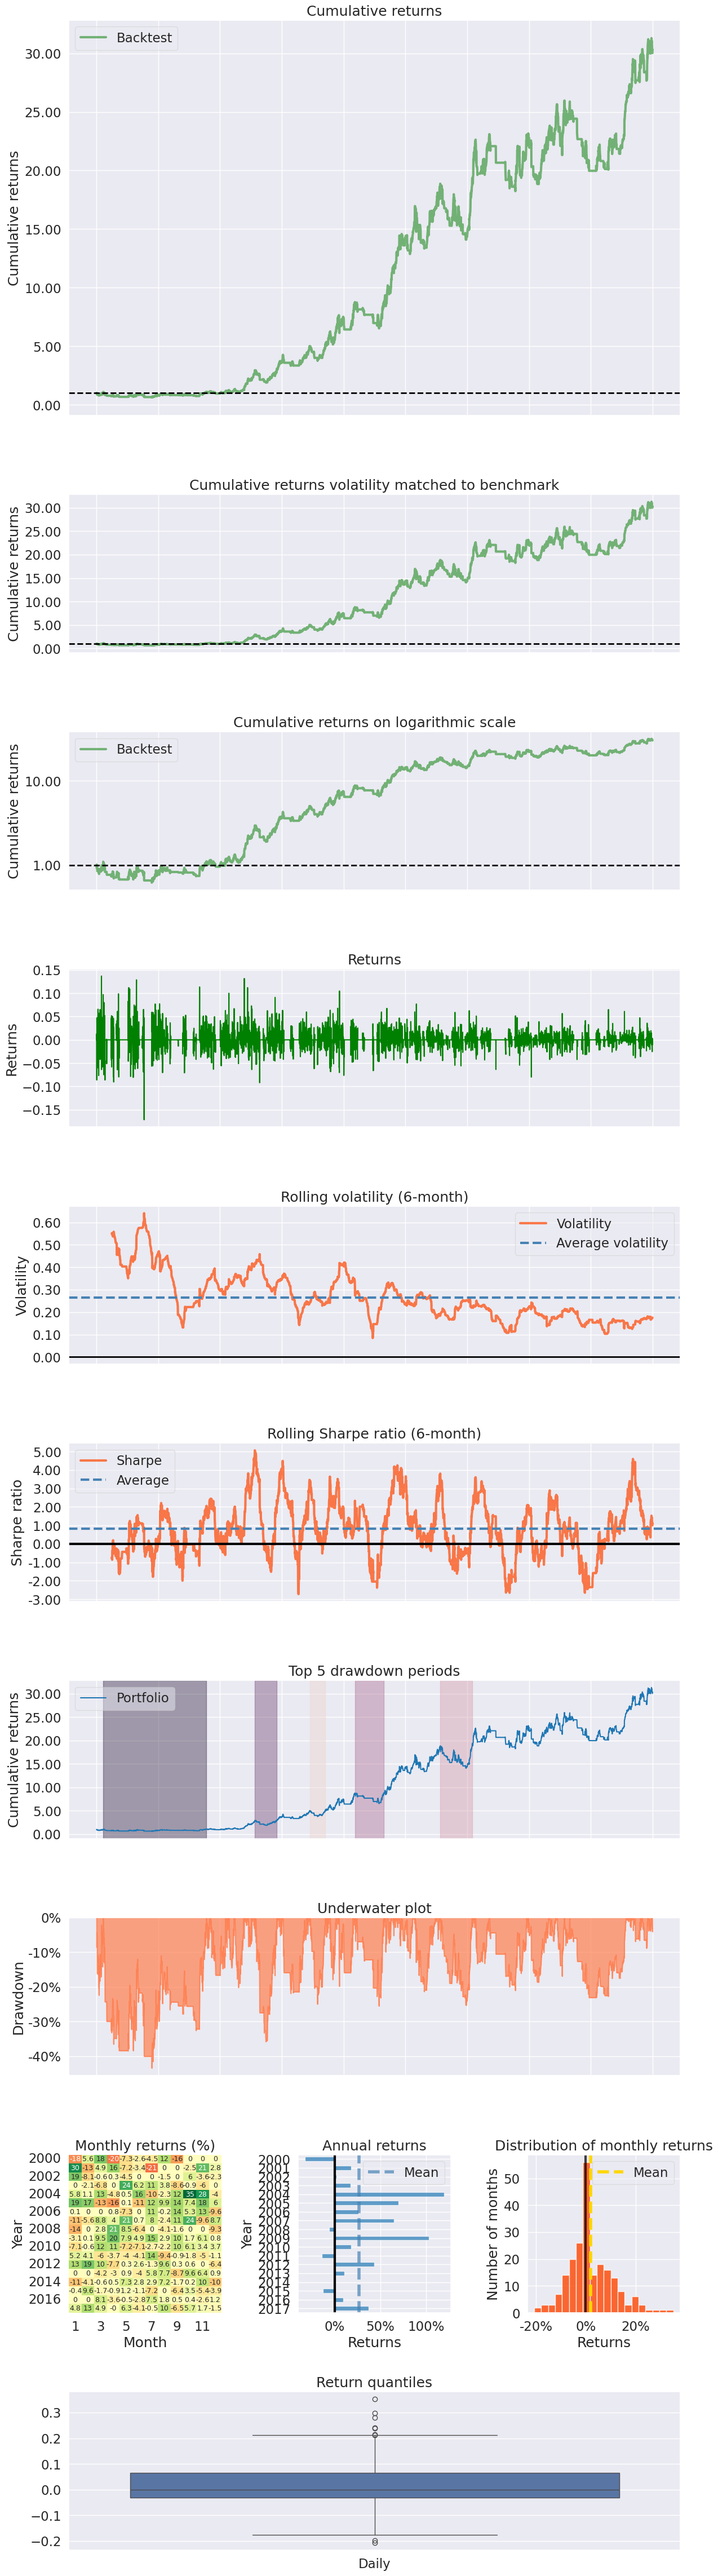

In [4]:
%matplotlib inline

from zipline import run_algorithm 
from zipline.api import order_target_percent, symbol, set_commission
from zipline.finance.commission import PerTrade
import pandas as pd
import pyfolio as pf

import warnings
warnings.filterwarnings('ignore')

def initialize(context): 
    context.stock = symbol('AAPL')
    context.rolling_window = 90
    set_commission(PerTrade(cost=5))     

def handle_data(context, data): 
    price_hist = data.history(context.stock, "close", context.rolling_window, "1d")          
    
    rolling_mean_short_term = price_hist.ewm(span=5,adjust=True,ignore_na=True).mean()
    rolling_mean_long_term = price_hist.ewm(span=30,adjust=True,ignore_na=True).mean()
    
    if rolling_mean_short_term[-1] > rolling_mean_long_term[-1]:
        order_target_percent(context.stock, 1.0)     
    elif rolling_mean_short_term[-1] < rolling_mean_long_term[-1]:
        order_target_percent(context.stock, 0.0)     

def analyze(context, perf): 
    returns, positions, transactions = pf.utils.extract_rets_pos_txn_from_zipline(perf) 
    pf.create_returns_tear_sheet(returns, benchmark_rets = None)
    
# start_date = pd.to_datetime('2000-1-1', utc=True)
# end_date = pd.to_datetime('2018-1-1', utc=True)
start_date = pd.Timestamp('2000-1-1')
end_date = pd.Timestamp('2018-1-1')
    
results = run_algorithm(start = start_date, end = end_date, initialize = initialize, analyze = analyze, handle_data = handle_data, capital_base = 10000, data_frequency = 'daily', bundle ='quandl')

## RSI Strategy

In [2]:
# from stockstats import StockDataFrame as sdf

#StockDataFrame works as a wrapper for the pandas.DataFrame. 
#You need to Initialize the StockDataFrame with wrap or StockDataFrame.retype

# '''Supply a wrapper StockDataFrame for pandas.DataFrame with inline stock statistics/indicators support.

# Supported statistics/indicators are:

#     delta
#     permutation (zero-based)
#     log return
#     max in range
#     min in range
#     middle = (close + high + low) / 3
#     compare: le, ge, lt, gt, eq, ne
#     count: both backward(c) and forward(fc)
#     cross: including upward cross and downward cross
#     SMA: Simple Moving Average
#     EMA: Exponential Moving Average
#     MSTD: Moving Standard Deviation
#     MVAR: Moving Variance
#     RSV: Raw Stochastic Value
#     RSI: Relative Strength Index
#     KDJ: Stochastic Oscillator
#     Bolling: Bollinger Band
#     MACD: Moving Average Convergence Divergence
#     CR: Energy Index (Intermediate Willingness Index)
#     WR: Williams Overbought/Oversold index
#     CCI: Commodity Channel Index
#     TR: True Range
#     ATR: Average True Range
#     DMA: Different of Moving Average (10, 50)
#     DMI: Directional Moving Index, including
#         +DI: Positive Directional Indicator
#         -DI: Negative Directional Indicator
#         ADX: Average Directional Movement Index
#         ADXR: Smoothed Moving Average of ADX
#     TRIX: Triple Exponential Moving Average
#     TEMA: Another Triple Exponential Moving Average
#     VR: Volume Variation Index
#     MFI: Money Flow Index
#     VWMA: Volume Weighted Moving Average
#     CHOP: Choppiness Index
#     KER: Kaufman's efficiency ratio
#     KAMA: Kaufman's Adaptive Moving Average
#     PPO: Percentage Price Oscillator
#     StochRSI: Stochastic RSI
#     WT: LazyBear's Wave Trend
#     Supertrend: with the Upper Band and Lower Band
#     Aroon: Aroon Oscillator
#     Z: Z-Score
#     AO: Awesome Oscillator
#     BOP: Balance of Power
#     MAD: Mean Absolute Deviation
#     ROC: Rate of Change
#     Coppock: Coppock Curve
#     Ichimoku: Ichimoku Cloud
#     CTI: Correlation Trend Indicator
#     LRMA: Linear Regression Moving Average
#     ERI: Elder-Ray Index
#     FTR: the Gaussian Fisher Transform Price Reversals indicator
#     RVGI: Relative Vigor Index
#     Inertia: Inertia Indicator
#     KST: Know Sure Thing
#     PGO: Pretty Good Oscillator
#     PSL: Psychological Line
#     PVO: Percentage Volume Oscillator
#     QQE: Quantitative Qualitative Estimation
# '''

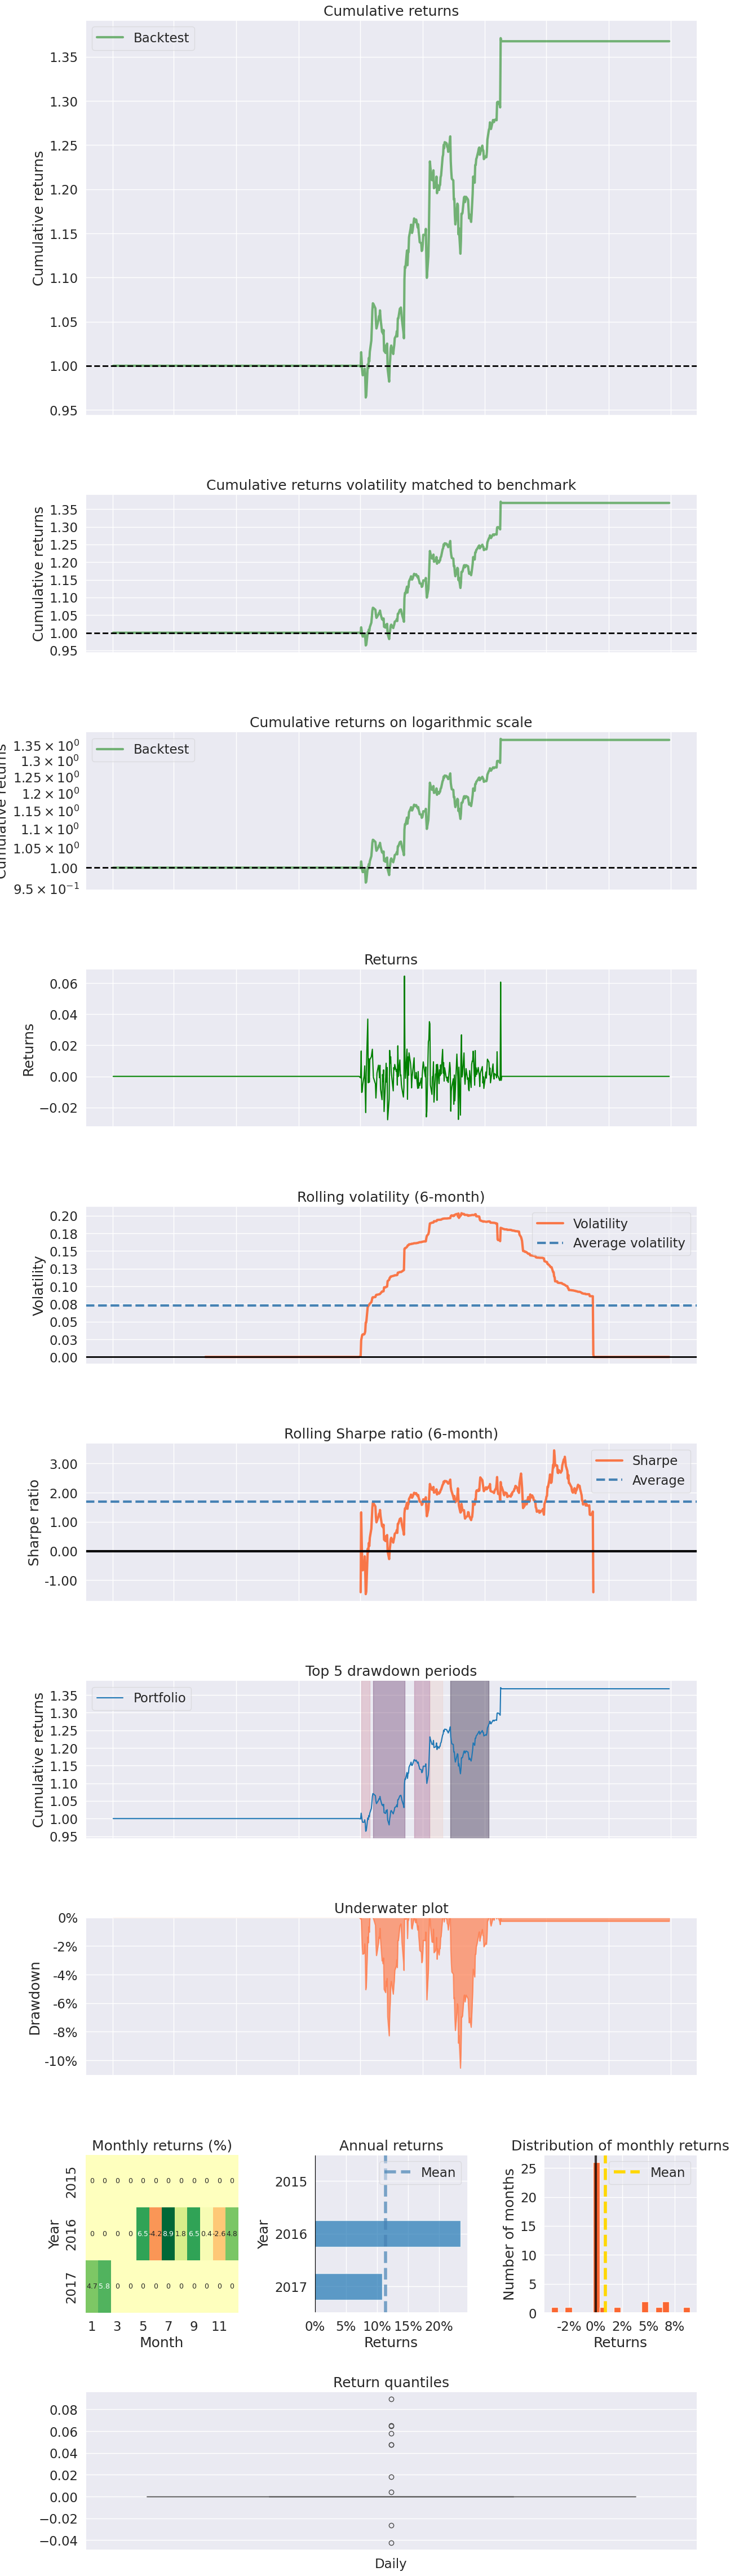

In [5]:
%matplotlib inline

from zipline import run_algorithm 
from zipline.api import order_target_percent, symbol, set_commission
from zipline.finance.commission import PerTrade
import pandas as pd
import pyfolio as pf
from stockstats import StockDataFrame as sdf

import warnings
warnings.filterwarnings('ignore')

def initialize(context): 
    context.stock = symbol('AAPL')
    context.rolling_window = 20
    set_commission(PerTrade(cost=5))     

def handle_data(context, data): 
    price_hist = data.history(context.stock, ["open", "high", "low","close"], context.rolling_window, "1d")             
    
    stock=sdf.retype(price_hist)   

    rsi = stock.get('rsi_12') #12 period RSI
    
    if rsi[-1] > 90: #overbought
        order_target_percent(context.stock, 0.0)     
    elif rsi[-1] < 10: #oversold
        order_target_percent(context.stock, 1.0)   
        
def analyze(context, perf): 
    returns, positions, transactions = pf.utils.extract_rets_pos_txn_from_zipline(perf) 
    pf.create_returns_tear_sheet(returns, benchmark_rets = None)
    
# start_date = pd.to_datetime('2015-1-1', utc=True)
# end_date = pd.to_datetime('2018-1-1', utc=True)
start_date = pd.Timestamp('2015-1-1')
end_date = pd.Timestamp('2018-1-1')
    
results = run_algorithm(start = start_date, end = end_date, initialize = initialize, analyze = analyze, handle_data = handle_data, capital_base = 10000, data_frequency = 'daily', bundle ='quandl')

## MACD Crossover Strategy

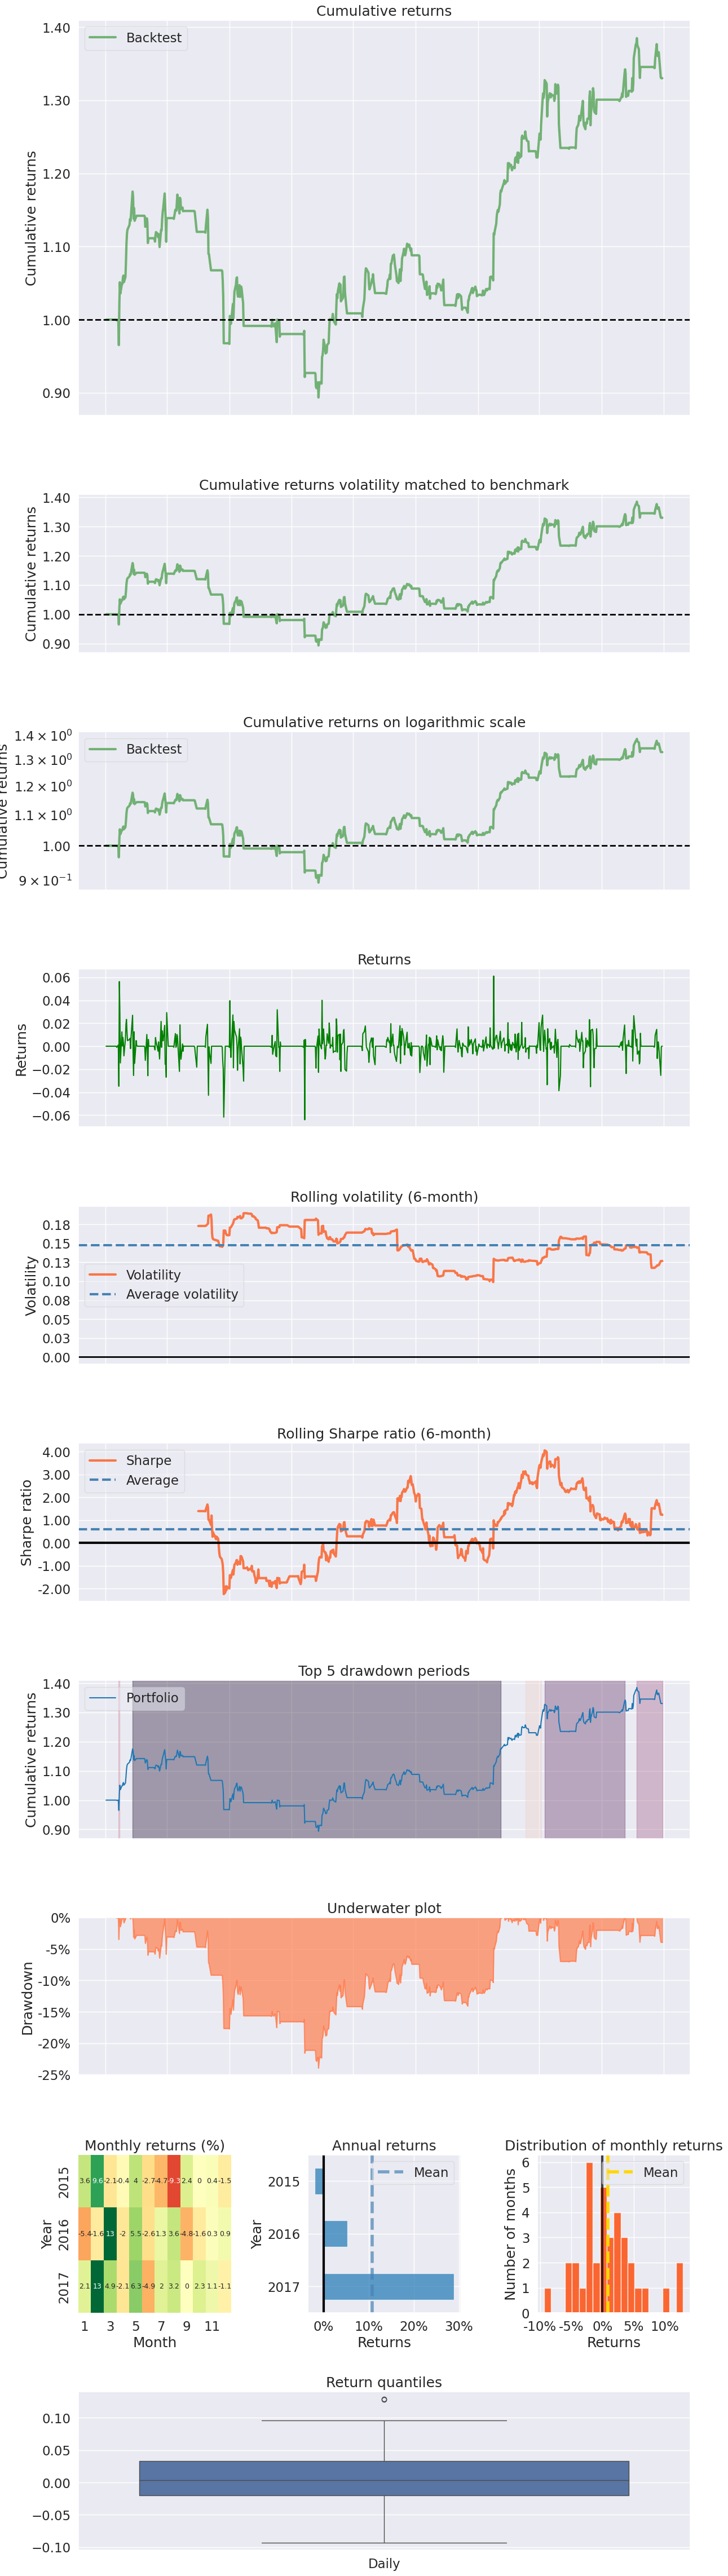

In [3]:
%matplotlib inline

from zipline import run_algorithm 
from zipline.api import order_target_percent, symbol, set_commission
from zipline.finance.commission import PerTrade
import pandas as pd
import pyfolio as pf
from stockstats import StockDataFrame as sdf

import warnings
warnings.filterwarnings('ignore')

def initialize(context): 
    context.stock = symbol('AAPL')
    context.rolling_window = 20
    set_commission(PerTrade(cost=5))     

def handle_data(context, data): 
    price_hist = data.history(context.stock, ["open", "high", "low","close"], context.rolling_window, "1d")             
    
    stock=sdf.retype(price_hist)   

    signal = stock['macds'] #signal line
    macd   = stock['macd'] #macd line
    
    if macd[-1] > signal[-1] and macd[-2] <= signal[-2]: #macd crossing over above signal line, indicating uptrend 
        order_target_percent(context.stock, 1.0)     
    elif macd[-1] < signal[-1] and macd[-2] >= signal[-2]: #macd crossing over below signal line, indicating uptrend 
        order_target_percent(context.stock, 0.0)   
        
def analyze(context, perf): 
    returns, positions, transactions = pf.utils.extract_rets_pos_txn_from_zipline(perf) 
    pf.create_returns_tear_sheet(returns, benchmark_rets = None)
    
# start_date = pd.to_datetime('2015-1-1', utc=True)
# end_date = pd.to_datetime('2018-1-1', utc=True)
start_date = pd.Timestamp('2015-1-1')
end_date = pd.Timestamp('2018-1-1')
    
results = run_algorithm(start = start_date, end = end_date, initialize = initialize, analyze = analyze, handle_data = handle_data, capital_base = 10000, data_frequency = 'daily', bundle ='quandl')

## RSI + MACD Strategy

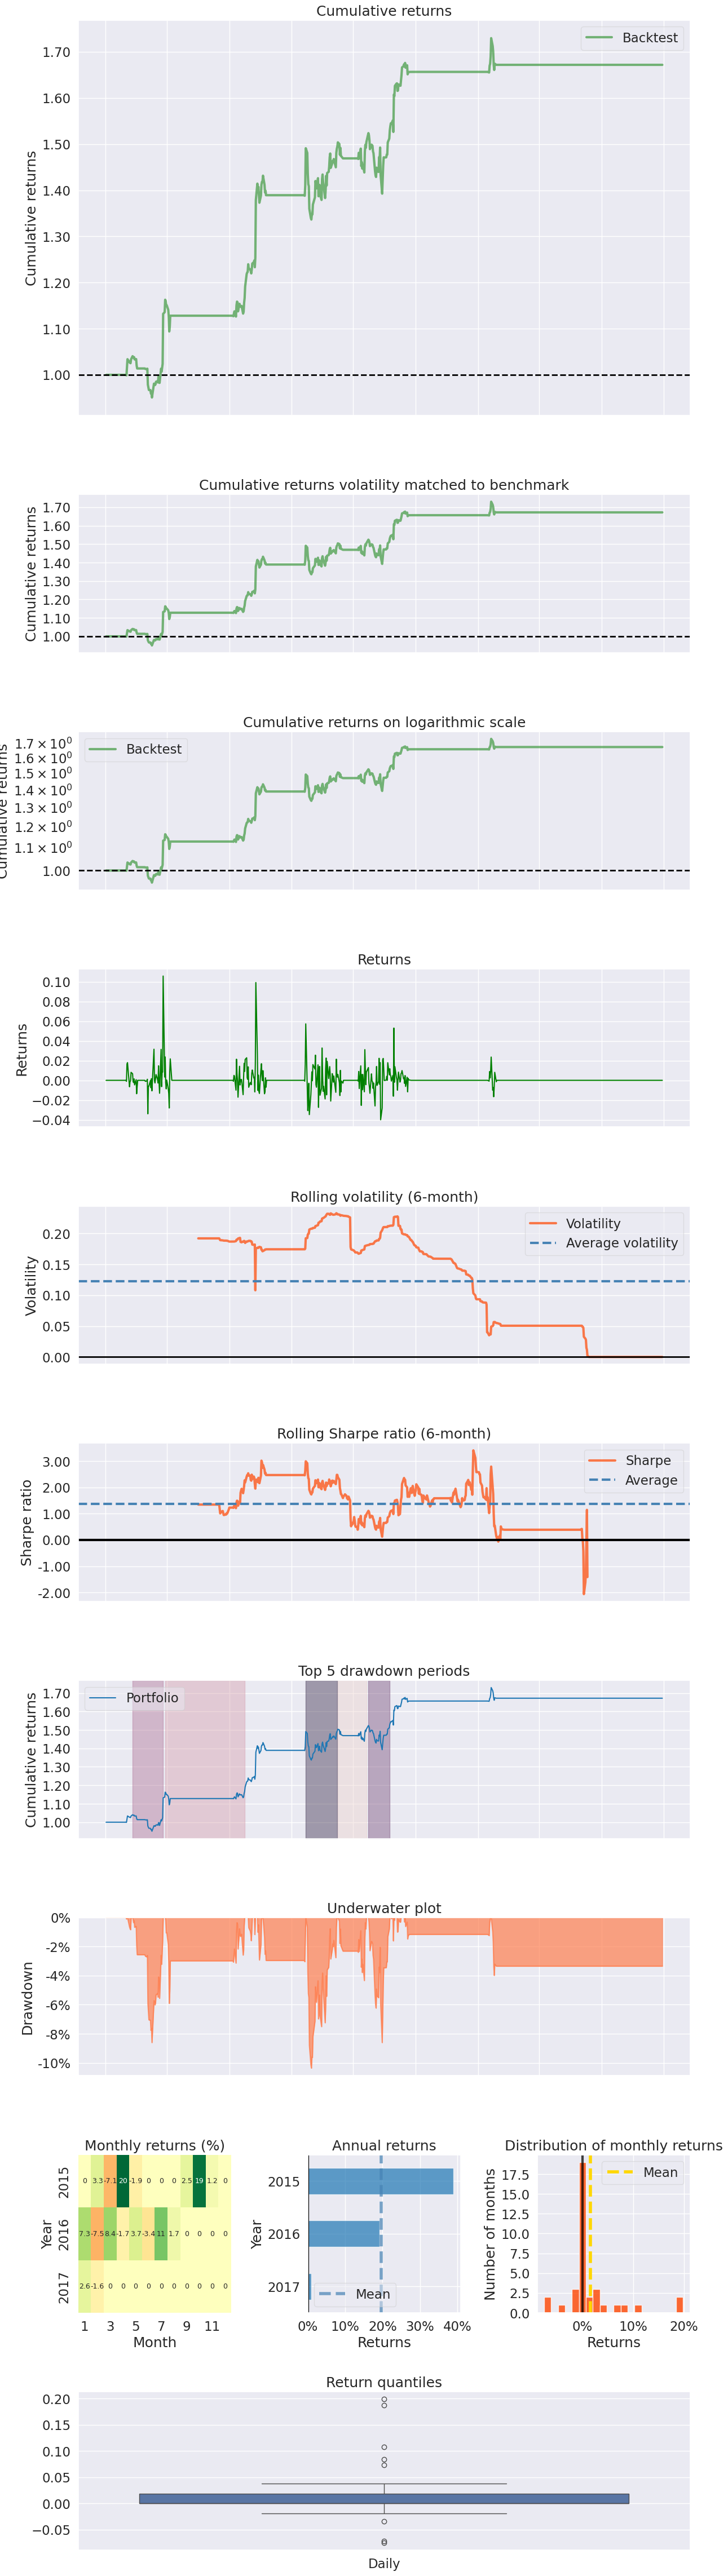

In [4]:
%matplotlib inline

from zipline import run_algorithm 
from zipline.api import order_target_percent, symbol, set_commission
from zipline.finance.commission import PerTrade
import pandas as pd
import pyfolio as pf
from stockstats import StockDataFrame as sdf

import warnings
warnings.filterwarnings('ignore')

def initialize(context): 
    context.stock = symbol('MSFT')
    context.rolling_window = 20
    set_commission(PerTrade(cost=5))     

def handle_data(context, data): 
    price_hist = data.history(context.stock, ["open", "high", "low","close"], context.rolling_window, "1d")             
    
    stock=sdf.retype(price_hist)   

    rsi = stock.get('rsi_12')
       
    signal = stock['macds']
    macd   = stock['macd'] 
        
    if rsi[-1] < 50 and macd[-1] > signal[-1] and macd[-2] <= signal[-2]: #macd indicates crossover above signal and rsi indicates oversold, buy
        order_target_percent(context.stock, 1.0)     
    elif rsi[-1] > 50 and macd[-1] < signal[-1] and macd[-2] >= signal[-2]: #macd indicates crossover below signal and rsi indicates overought
        order_target_percent(context.stock, 0.0)   
        
def analyze(context, perf): 
    returns, positions, transactions = pf.utils.extract_rets_pos_txn_from_zipline(perf) 
    pf.create_returns_tear_sheet(returns, benchmark_rets = None)
    
# start_date = pd.to_datetime('2015-1-1', utc=True)
# end_date = pd.to_datetime('2018-1-1', utc=True)
start_date = pd.Timestamp('2015-1-1')
end_date = pd.Timestamp('2018-1-1')
    
results = run_algorithm(start = start_date, end = end_date, initialize = initialize, analyze = analyze, handle_data = handle_data, capital_base = 10000, data_frequency = 'daily', bundle ='quandl')

## Triple Exponential Average (TRIX) Strategy

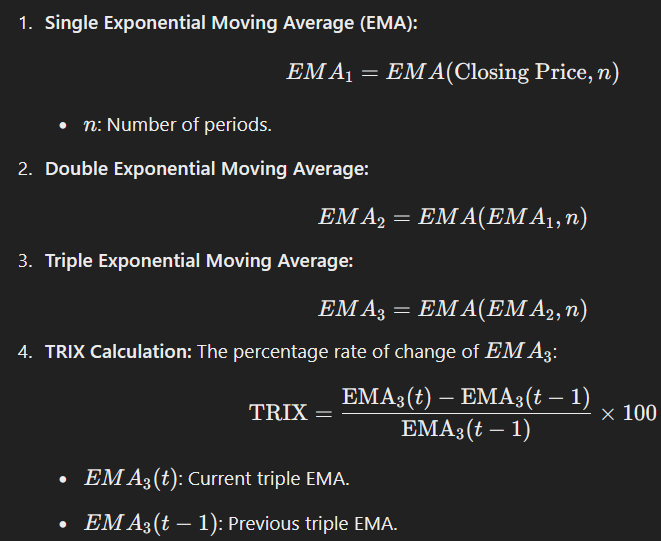

https://www.investopedia.com/articles/technical/02/092402.asp

Like many oscillators, TRIX oscillates around a zero line. When it is used as an oscillator, a positive value indicates an overbought market while a negative value indicates an oversold market.


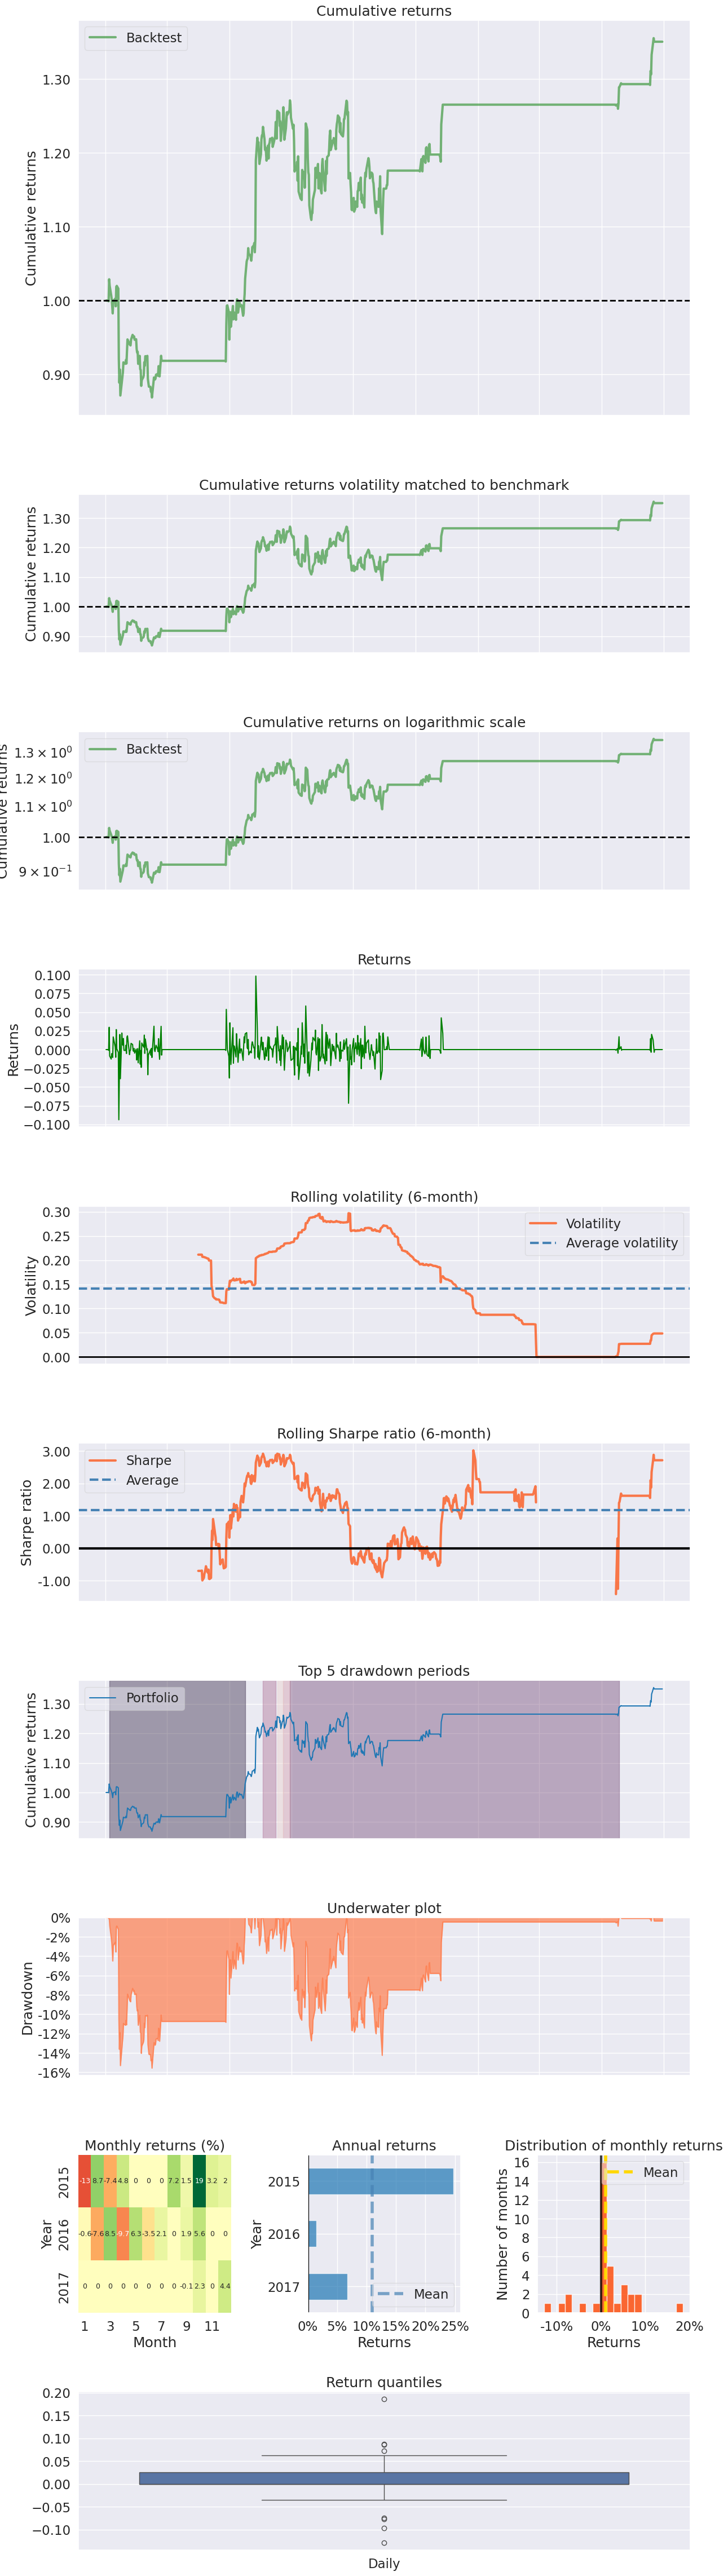

In [5]:
%matplotlib inline

from zipline import run_algorithm 
from zipline.api import order_target_percent, symbol, set_commission
from zipline.finance.commission import PerTrade
import pandas as pd
import pyfolio as pf
from stockstats import StockDataFrame as sdf

import warnings
warnings.filterwarnings('ignore')

def initialize(context): 
    context.stock = symbol('MSFT')
    context.rolling_window = 20
    set_commission(PerTrade(cost=5))     

def handle_data(context, data): 
    price_hist = data.history(context.stock, ["open", "high", "low","close"], context.rolling_window, "1d")             
    
    stock=sdf.retype(price_hist)   

    trix = stock.get('trix') #It requires column and window. By default, the column is close price, the window is 12.
    
    if trix[-1] > 0 and trix[-2] < 0: #increasing trend from previous period and decreasing trend from period before
        order_target_percent(context.stock, 0.0)     
    elif trix[-1] < 0 and trix[-2] > 0: #decreasing trend from previous period and increasing trend from period before, expect uptick
        order_target_percent(context.stock, 1.0)   
        
def analyze(context, perf): 
    returns, positions, transactions = pf.utils.extract_rets_pos_txn_from_zipline(perf) 
    pf.create_returns_tear_sheet(returns, benchmark_rets = None)
    
# start_date = pd.to_datetime('2015-1-1', utc=True)
# end_date = pd.to_datetime('2018-1-1', utc=True)
start_date = pd.Timestamp('2015-1-1')
end_date = pd.Timestamp('2018-1-1')
    
results = run_algorithm(start = start_date, end = end_date, initialize = initialize, analyze = analyze, handle_data = handle_data, capital_base = 10000, data_frequency = 'daily', bundle ='quandl')

Was reading on another Oscillator called Stochastic RSI and saw below
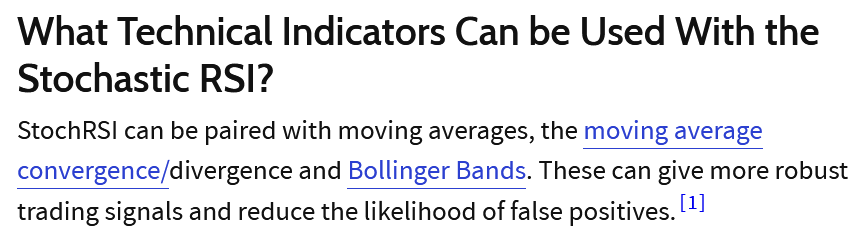

## Williams %R Strategy

https://www.investopedia.com/terms/w/williamsr.asp

The indicator tells a trader where the present price is relative to the highest high over the last 14 periods (or whatever number of periods going backward is chosen). 

A reading above -20 is overbought.
A reading below -80 is oversold.

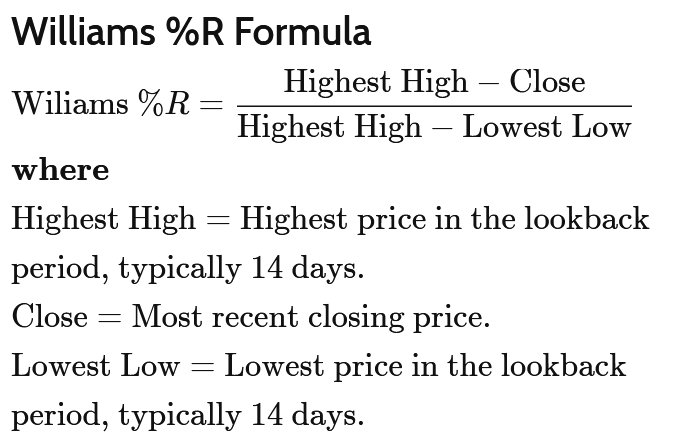

A very similar momentum indicator similar to Williams %R is Stochastic Oscillator (or Fast Stochastic Oscillator)
Slow Stochastic Oscillator is 3 Day moving average of %K

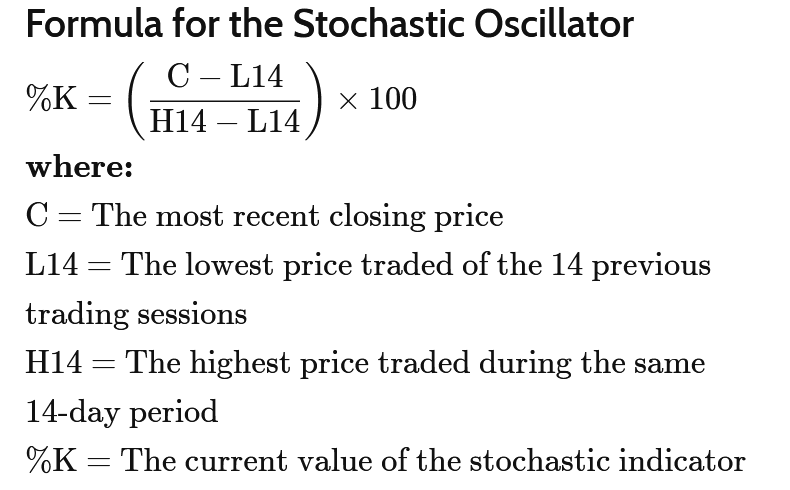

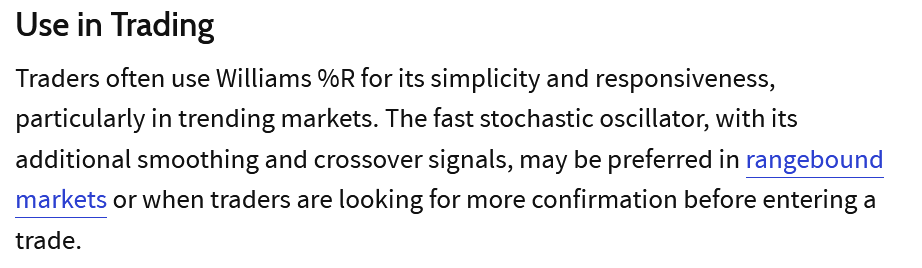

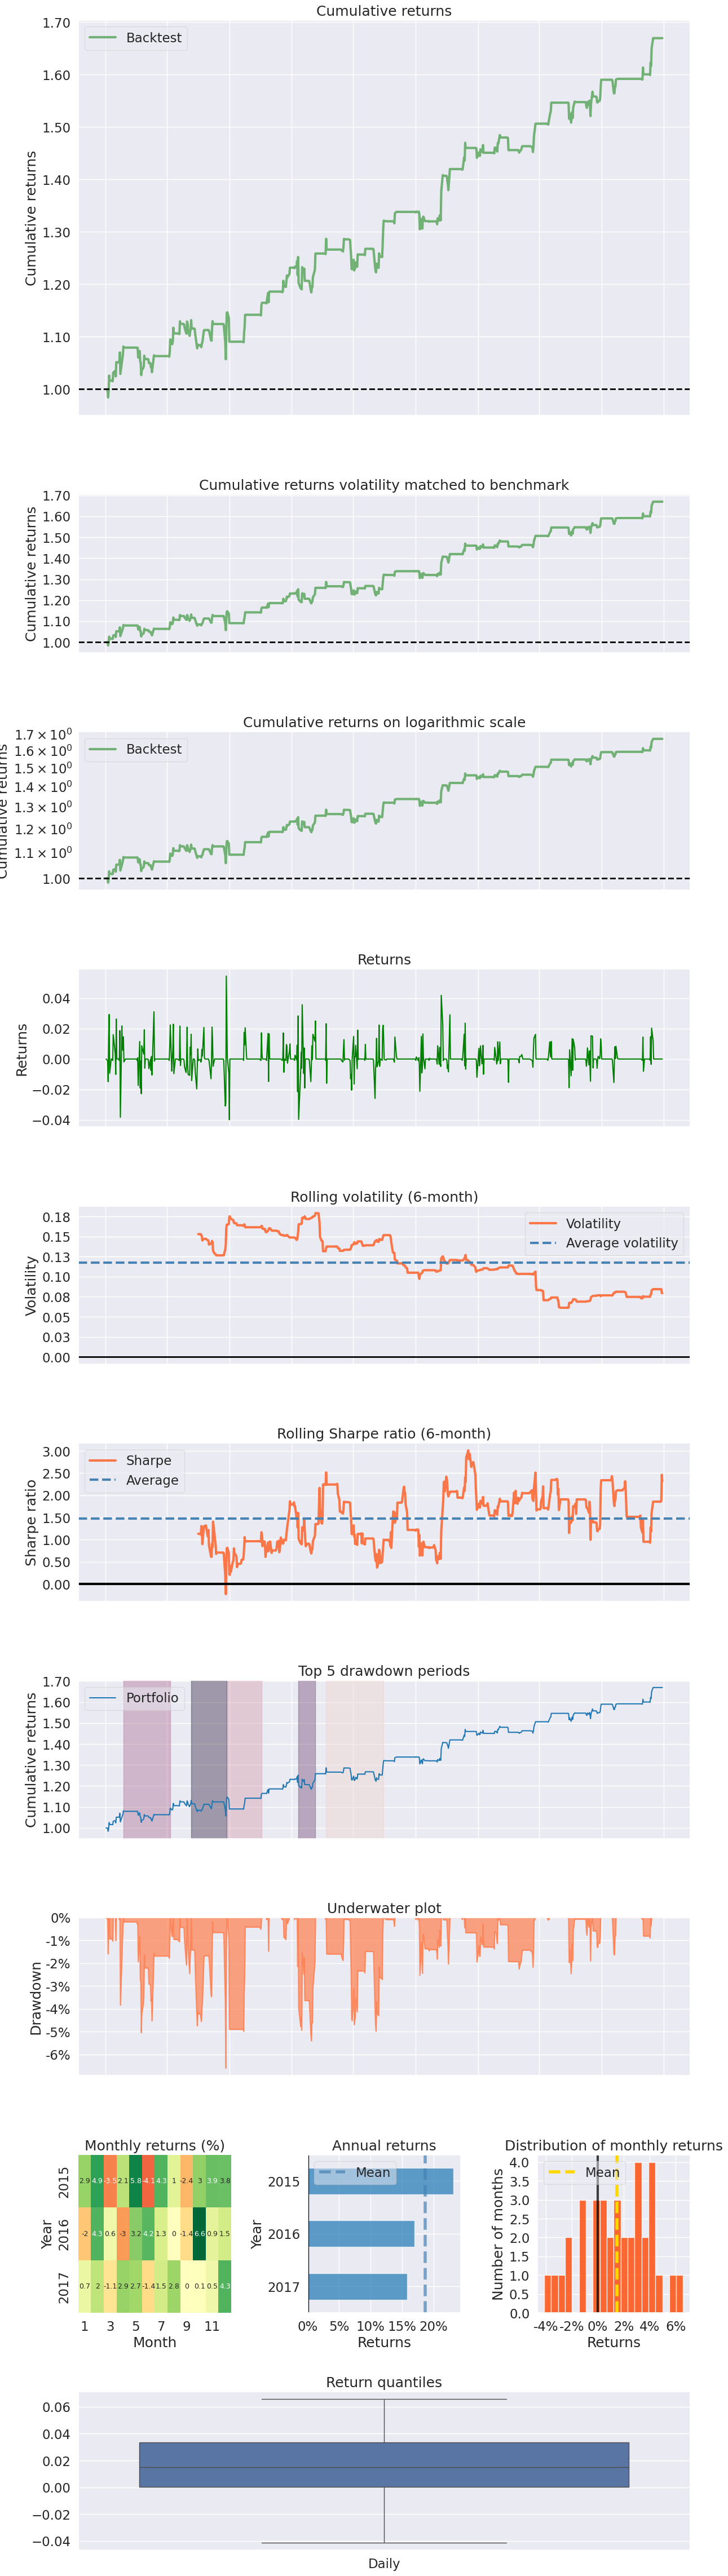

In [3]:
%matplotlib inline

from zipline import run_algorithm 
from zipline.api import order_target_percent, symbol, set_commission
from zipline.finance.commission import PerTrade
import pandas as pd
import pyfolio as pf
from stockstats import StockDataFrame as sdf

import warnings
warnings.filterwarnings('ignore')

def initialize(context): 
    context.stock = symbol('MSFT')
    context.rolling_window = 20
    set_commission(PerTrade(cost=5))     

def handle_data(context, data): 
    price_hist = data.history(context.stock, ["open", "high", "low","close"], context.rolling_window, "1d")             
    
    stock=sdf.retype(price_hist)   

    wr = stock.get('wr_6') #The default window is 14.
    
    if wr[-1] > -20:
        order_target_percent(context.stock, 0.0)     
    elif wr[-1] < -80:
        order_target_percent(context.stock, 1.0)   
        
def analyze(context, perf): 
    returns, positions, transactions = pf.utils.extract_rets_pos_txn_from_zipline(perf) 
    pf.create_returns_tear_sheet(returns, benchmark_rets = None)
    
# start_date = pd.to_datetime('2015-1-1', utc=True)
# end_date = pd.to_datetime('2018-1-1', utc=True)
start_date = pd.Timestamp('2015-1-1')
end_date = pd.Timestamp('2018-1-1')
    
results = run_algorithm(start = start_date, end = end_date, initialize = initialize, analyze = analyze, handle_data = handle_data, capital_base = 10000, data_frequency = 'daily', bundle ='quandl')

# Mean Reversion Strategies

## Bollinger Band Trading Strategy

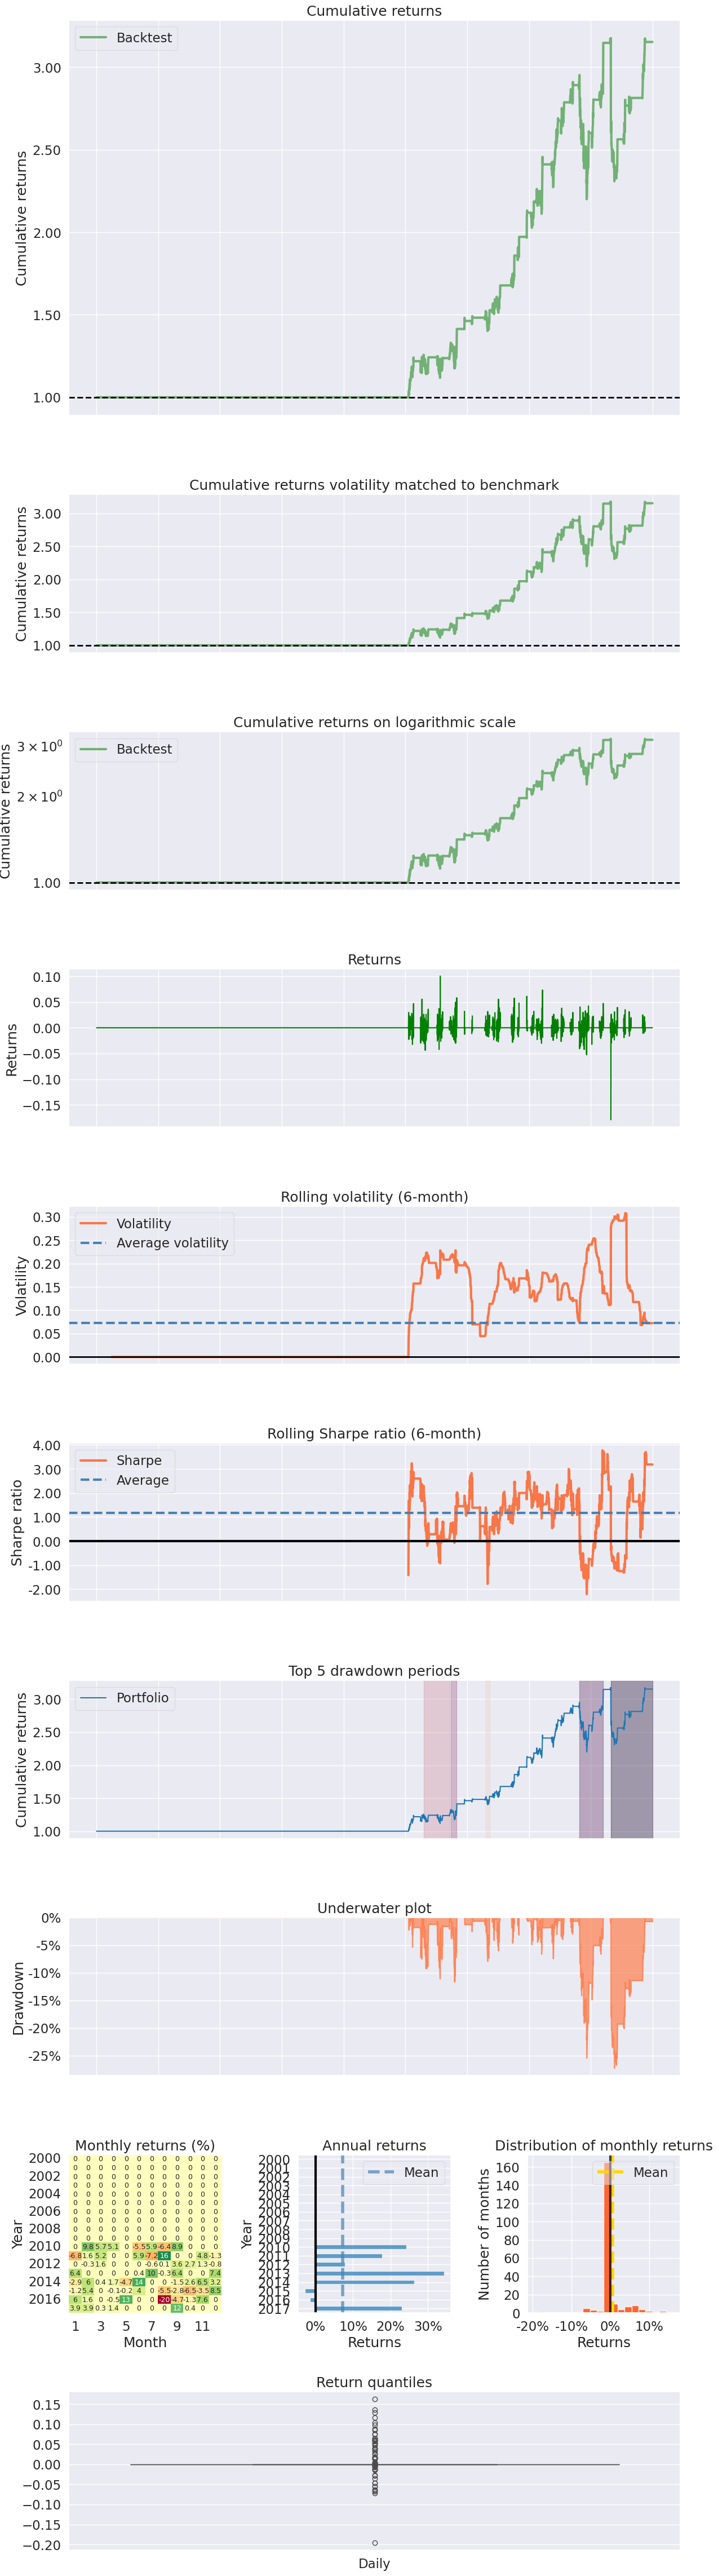

In [10]:
%matplotlib inline

from zipline import run_algorithm 
from zipline.api import order_target_percent, symbol, set_commission
from zipline.finance.commission import PerTrade
import pandas as pd
import pyfolio as pf

import warnings
warnings.filterwarnings('ignore')

def initialize(context): 
    context.stock = symbol('DG')
    #Dollar General Corp
    context.rolling_window = 20 
    set_commission(PerTrade(cost=5))     

def handle_data(context, data): 
    price_hist = data.history(context.stock, "close", context.rolling_window, "1d")          
    
    middle_base_line = price_hist.mean() #mean of all data upto that point
    std_line =  price_hist.std() #std of all data upto that point
    lower_band = middle_base_line - 2 * std_line
    upper_band = middle_base_line + 2 * std_line
   
    if price_hist[-1] < lower_band: 
        order_target_percent(context.stock, 1.0)     
    elif price_hist[-1] > upper_band:
        order_target_percent(context.stock, 0.0)     

def analyze(context, perf): 
    returns, positions, transactions = pf.utils.extract_rets_pos_txn_from_zipline(perf) 
    pf.create_returns_tear_sheet(returns, benchmark_rets = None)
    
# start_date = pd.to_datetime('2000-1-1', utc=True)
# end_date = pd.to_datetime('2018-1-1', utc=True)
start_date = pd.Timestamp('2000-1-1')
end_date = pd.Timestamp('2018-1-1')
    
results = run_algorithm(start = start_date, end = end_date, initialize = initialize, analyze = analyze, handle_data = handle_data, capital_base = 10000, data_frequency = 'daily', bundle ='quandl')

## Pairs-Trading Strategy

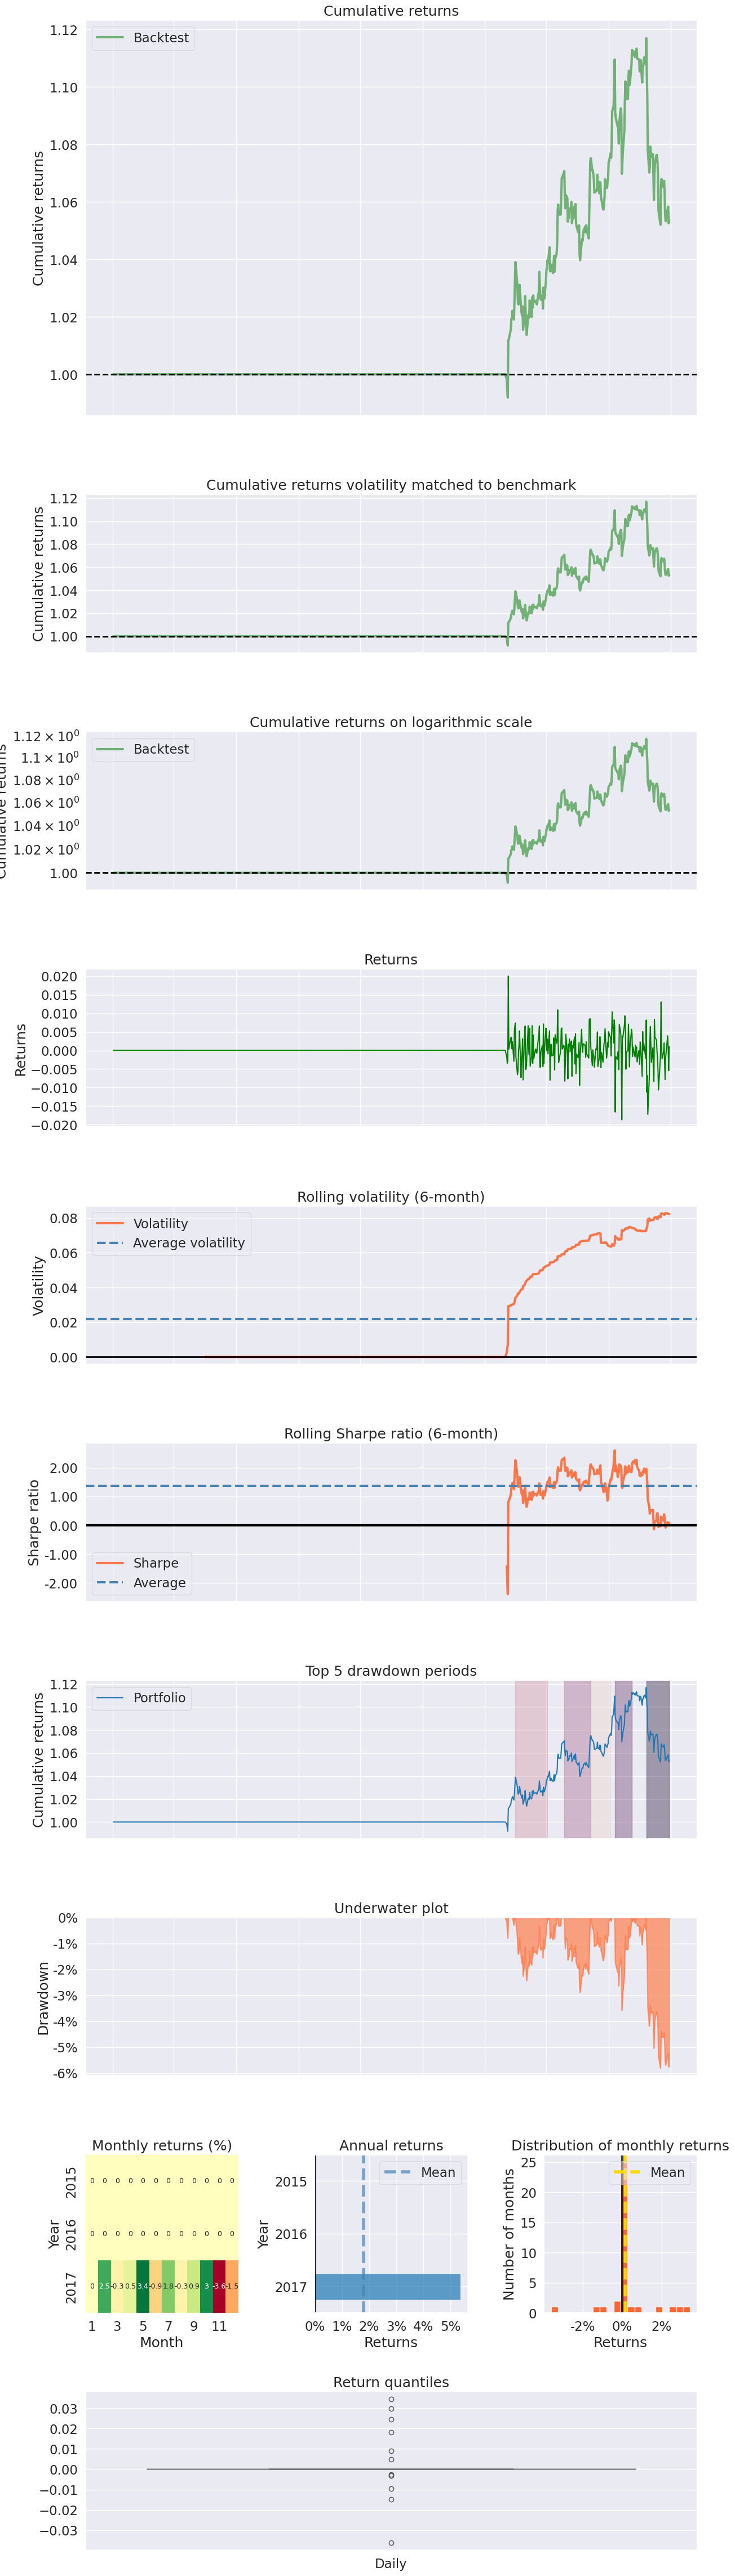

In [11]:
%matplotlib inline

from zipline import run_algorithm 
from zipline.api import order_target_percent, symbol, set_commission
from zipline.finance.commission import PerTrade
import pandas as pd
import pyfolio as pf
import numpy as np
import statsmodels.api as sm
from statsmodels.tsa.stattools import coint


import warnings
warnings.filterwarnings('ignore')

def initialize(context): 
    context.stock_x = symbol('PEP') #pepsico
    context.stock_y = symbol('KO') #coca cola
    context.rolling_window = 500 
    set_commission(PerTrade(cost=5))       
    context.i = 0
    
def handle_data(context, data):   
    context.i += 1
    if context.i < context.rolling_window:
        return
    
    try:
        x_price = data.history(context.stock_x, "close", context.rolling_window, "1d")
        x = np.log(x_price)
        
        y_price = data.history(context.stock_y, "close", context.rolling_window, "1d")
        y = np.log(y_price)

        _, p_value, _  = coint(x, y)
        if p_value < .9:
            return
        
        slope, intercept = sm.OLS(y, sm.add_constant(x, prepend=True)).fit().params
        
        spread = y - (slope * x + intercept)
        zscore = (spread[-1] - spread.mean()) / spread.std()    
        
        if -1 < zscore < 1:
            return

        side = np.copysign(0.5, zscore)
        order_target_percent(context.stock_y, -side * 100 / y_price[-1])
        order_target_percent(context.stock_x,  side * slope * 100 / x_price[-1])    
    except:
        pass

def analyze(context, perf): 
    returns, positions, transactions = pf.utils.extract_rets_pos_txn_from_zipline(perf) 
    pf.create_returns_tear_sheet(returns, benchmark_rets = None)
    
# start_date = pd.to_datetime('2015-1-1', utc=True)
# end_date = pd.to_datetime('2018-01-01', utc=True)
start_date = pd.Timestamp('2015-1-1')
end_date = pd.Timestamp('2018-1-1')
    
results = run_algorithm(start = start_date, end = end_date, initialize = initialize, analyze = analyze, handle_data = handle_data, capital_base = 10000, data_frequency = 'daily', bundle ='quandl')


# Mathematical Model Based Strategies

## Minimization of Portfolio Volatility Strategy with Monthly Trading

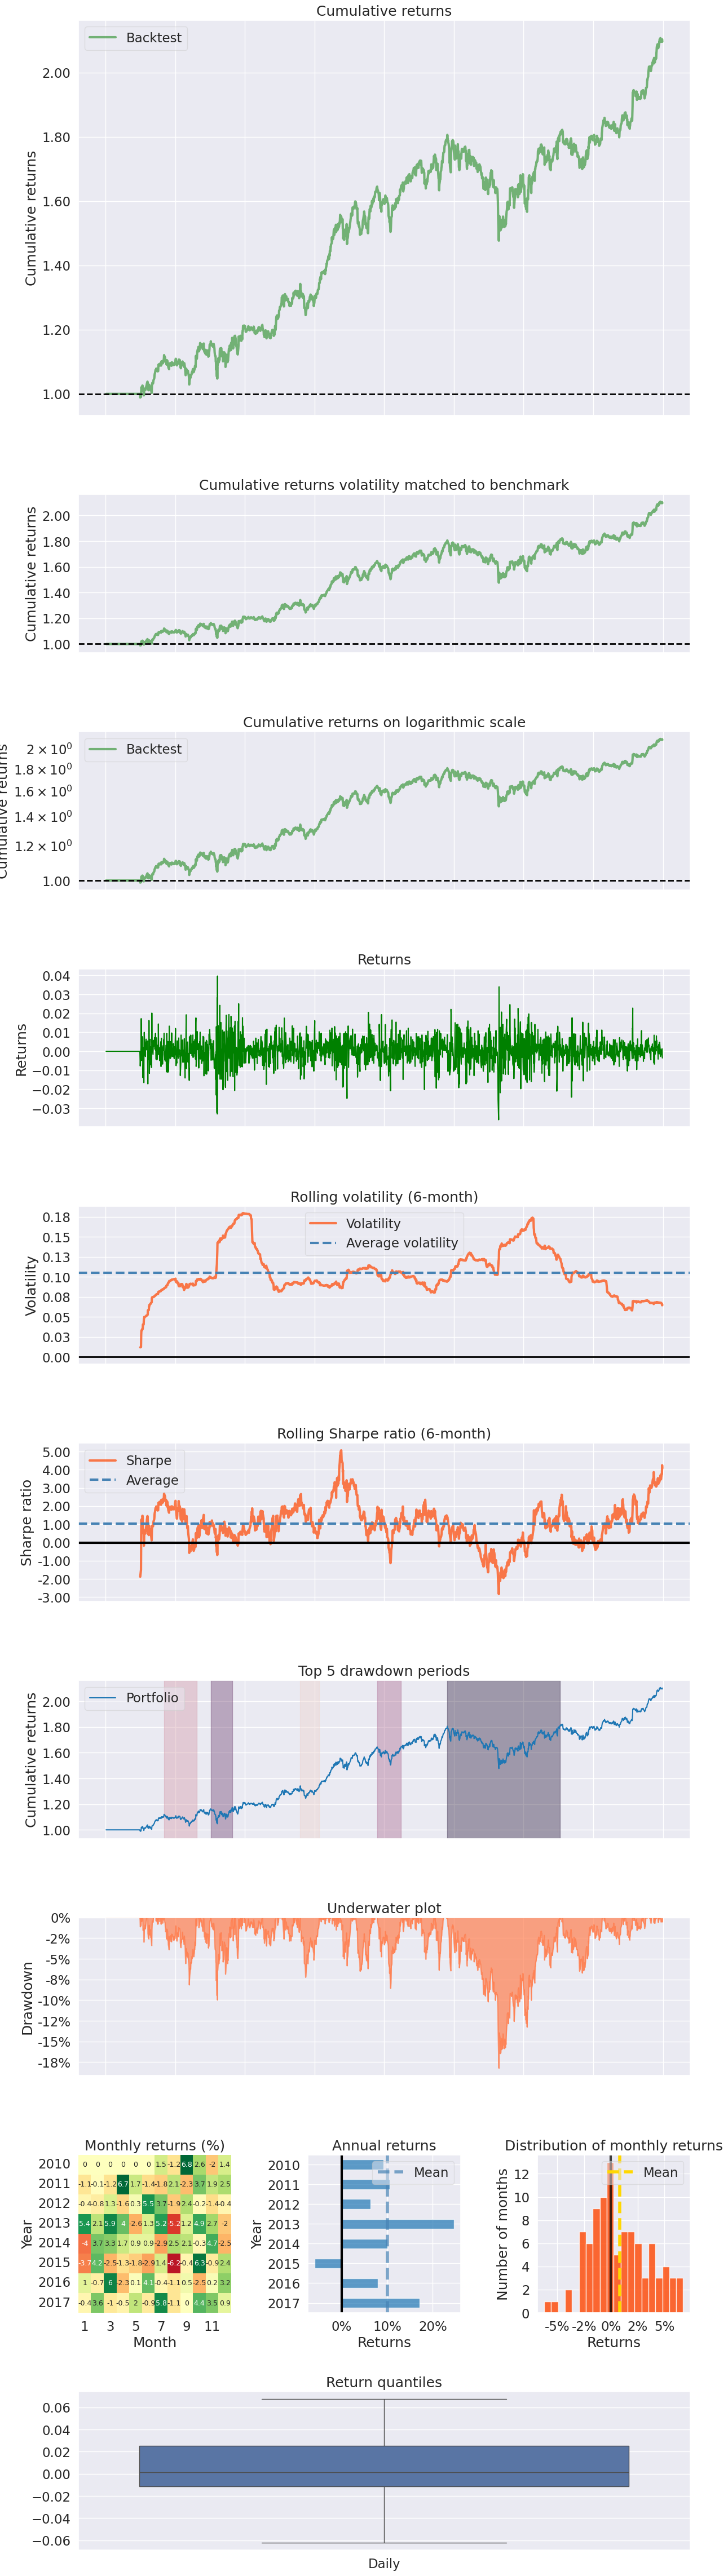

In [12]:
%matplotlib inline

from zipline import run_algorithm 
from zipline.api import order_target_percent, symbol, set_commission, schedule_function, date_rules, time_rules
from zipline.finance.commission import PerTrade
import pandas as pd
import pyfolio as pf
from scipy.optimize import minimize
import numpy as np

import warnings
warnings.filterwarnings('ignore')

def initialize(context): 
    context.stocks = [symbol('DIS'),symbol('WMT'),symbol('DOW'),symbol('CRM'),symbol('NKE'),symbol('HD'),symbol('V'),symbol('MSFT'),symbol('MMM'),symbol('CSCO'),symbol('KO'),symbol('AAPL'),symbol('HON'),symbol('JNJ'),symbol('TRV'),symbol('PG'),symbol('CVX'),symbol('VZ'),symbol('CAT'),symbol('BA'),symbol('AMGN'),symbol('IBM'),symbol('AXP'),symbol('JPM'),symbol('WBA'),symbol('MCD'),symbol('MRK'),symbol('GS'),symbol('UNH'),symbol('INTC')]
    context.rolling_window = 200
    set_commission(PerTrade(cost=5))
    schedule_function(handle_data, date_rules.month_end(), time_rules.market_open(hours=1))
    
def minimum_vol_obj(wo, cov):
    w = wo.reshape(-1, 1)
    sig_p = np.sqrt(np.matmul(w.T, np.matmul(cov, w)))[0, 0]
    return sig_p

def handle_data(context, data): 
    n_stocks = len(context.stocks)
    prices = None
    
    for i in range(n_stocks):
        price_history = data.history(context.stocks[i], "close", context.rolling_window, "1d")
        
        price = np.array(price_history)
        if prices is None:
            prices = price
        else:
            prices = np.c_[prices, price]
    
    rets = prices[1:,:]/prices[0:-1, :]-1.0
    mu = np.mean(rets, axis=0)
    cov = np.cov(rets.T)    
           
    w0 = np.ones(n_stocks) / n_stocks
    
    cons = ({'type': 'eq', 'fun': lambda w: np.sum(w) - 1.0}, {'type': 'ineq', 'fun': lambda w: w})
    TOL = 1e-12    
    res = minimize(minimum_vol_obj, w0, args=cov, method='SLSQP', constraints=cons, tol=TOL, options={'disp': False})
    
    if not res.success:
        return;
    
    w = res.x
    
    for i in range(n_stocks):
        order_target_percent(context.stocks[i], w[i])    

def analyze(context, perf): 
    returns, positions, transactions = pf.utils.extract_rets_pos_txn_from_zipline(perf) 
    pf.create_returns_tear_sheet(returns, benchmark_rets = None)
    
# start_date = pd.to_datetime('2010-1-1', utc=True)
# end_date = pd.to_datetime('2018-1-1', utc=True)

start_date = pd.Timestamp('2010-1-1')
end_date = pd.Timestamp('2018-1-1')
    
results = run_algorithm(start = start_date, end = end_date, initialize = initialize, analyze = analyze, capital_base = 10000, data_frequency = 'daily', bundle ='quandl')

## Maximum Sharpe Ratio Strategy with Monthly Trading 

Cannot place order for DOW, as it has de-listed. Any existing positions for this asset will be liquidated on 2017-09-01 00:00:00.
Cannot place order for DOW, as it has de-listed. Any existing positions for this asset will be liquidated on 2017-09-01 00:00:00.
Cannot place order for DOW, as it has de-listed. Any existing positions for this asset will be liquidated on 2017-09-01 00:00:00.
Cannot place order for DOW, as it has de-listed. Any existing positions for this asset will be liquidated on 2017-09-01 00:00:00.


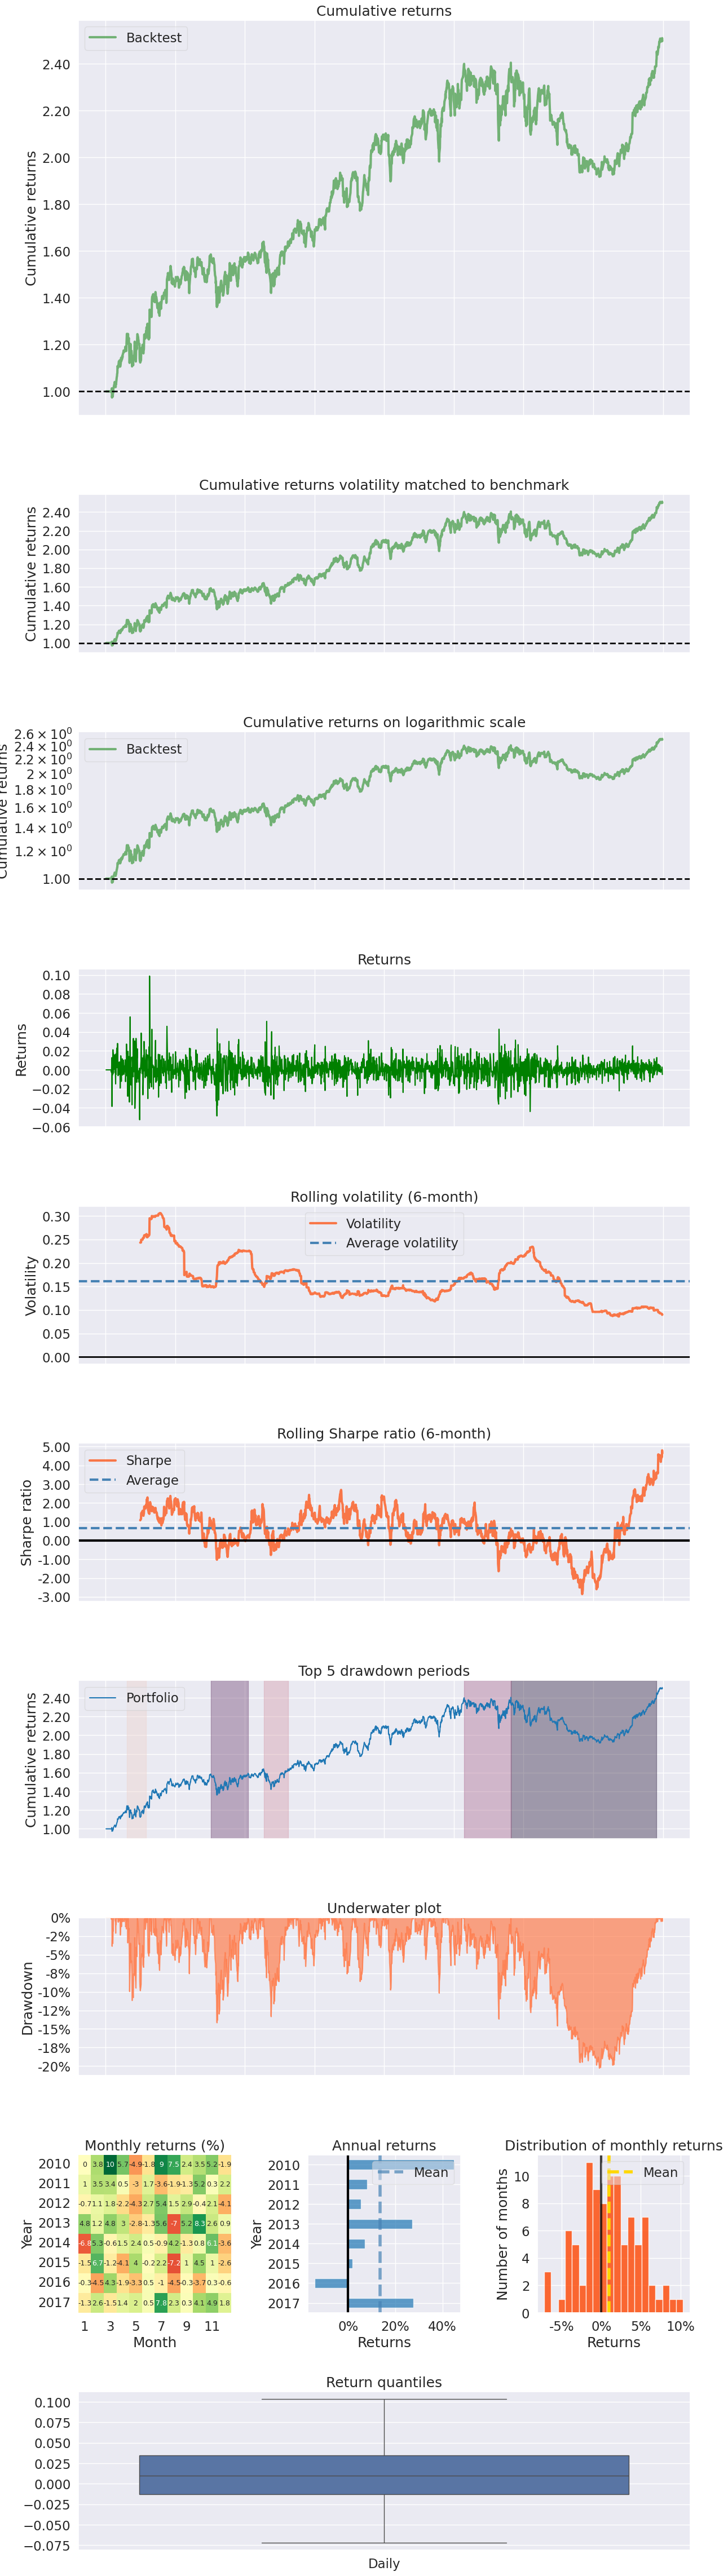

In [2]:
%matplotlib inline

from zipline import run_algorithm 
from zipline.api import order_target_percent, symbols, set_commission, schedule_function, date_rules, time_rules
from zipline.finance.commission import PerTrade
import pandas as pd
import pyfolio as pf
import numpy as np
from pypfopt.efficient_frontier import EfficientFrontier
from pypfopt import risk_models
from pypfopt import expected_returns

import warnings
warnings.filterwarnings('ignore')
import numpy as np
np.NINF=  np.inf
pd.Series.iteritems = pd.Series.items

def initialize(context): 
    context.stocks = symbols('DIS','WMT','DOW','CRM','NKE','HD','V','MSFT','MMM','CSCO','KO','AAPL','HON','JNJ','TRV','PG','CVX','VZ','CAT','BA','AMGN','IBM','AXP','JPM','WBA','MCD','MRK','GS','UNH','INTC')
    context.rolling_window = 252
    set_commission(PerTrade(cost=5))
    schedule_function(handle_data, date_rules.month_end(), time_rules.market_open(hours=1))
    
def handle_data(context, data): 
    prices_history = data.history(context.stocks, "close", context.rolling_window, "1d")
    avg_returns = expected_returns.mean_historical_return(prices_history)
    cov_mat = risk_models.sample_cov(prices_history)

    efficient_frontier = EfficientFrontier(avg_returns, cov_mat)
    weights = efficient_frontier.max_sharpe()
    cleaned_weights = efficient_frontier.clean_weights()
    
    for stock in context.stocks:
        order_target_percent(stock, cleaned_weights[stock])

def analyze(context, perf): 
    returns, positions, transactions = pf.utils.extract_rets_pos_txn_from_zipline(perf) 
    pf.create_returns_tear_sheet(returns, benchmark_rets = None)
    
# start_date = pd.to_datetime('2010-1-1', utc=True)
# end_date = pd.to_datetime('2018-1-1', utc=True)

start_date = pd.Timestamp('2010-1-1')
end_date = pd.Timestamp('2018-1-1')
    
results = run_algorithm(start = start_date, end = end_date, initialize = initialize, analyze = analyze, capital_base = 10000, data_frequency = 'daily', bundle ='quandl')

# Time Series Prediction Based Strategies

## SARIMAX Strategy

In [1]:
%matplotlib inline

from zipline import run_algorithm 
from zipline.api import order_target_percent, symbol, set_commission
from zipline.finance.commission import PerTrade
import pandas as pd
import pyfolio as pf
import pmdarima as pm

import warnings
warnings.filterwarnings('ignore')

def initialize(context): 
    context.stock = symbol('AAPL')
    context.rolling_window = 90
    set_commission(PerTrade(cost=5)) 


def handle_data(context, data): 
    price_hist = data.history(context.stock, "close", context.rolling_window, "1d")               
    try:
        model = pm.auto_arima(price_hist, seasonal=True)
        forecasts = model.predict(7)      
        order_target_percent(context.stock, 1.0 if price_hist[-1] < forecasts[-1] else 0.0) 
    except:
        pass

def analyze(context, perf): 
    returns, positions, transactions = pf.utils.extract_rets_pos_txn_from_zipline(perf) 
    pf.create_returns_tear_sheet(returns, benchmark_rets = None)
    
# start_date = pd.to_datetime('2017-1-1', utc=True)
# end_date = pd.to_datetime('2018-1-1', utc=True)

start_date = pd.to_datetime('2017-1-1', utc=True)
end_date = pd.to_datetime('2018-1-1', utc=True)

results = run_algorithm(start = start_date, end = end_date, initialize = initialize, analyze = analyze, handle_data = handle_data, capital_base = 10000, data_frequency = 'daily', bundle ='quandl')

ValueError: numpy.dtype size changed, may indicate binary incompatibility. Expected 96 from C header, got 88 from PyObject

## Prophet Strategy

In [14]:
%matplotlib inline

from zipline import run_algorithm 
from zipline.api import order_target_percent, symbol, set_commission
from zipline.finance.commission import PerTrade
import pandas as pd
import pyfolio as pf
from fbprophet import Prophet
import logging

logging.getLogger('fbprophet').setLevel(logging.WARNING)

import warnings
warnings.filterwarnings('ignore')

def initialize(context): 
    context.stock = symbol('AAPL')
    context.rolling_window = 90
    set_commission(PerTrade(cost=5)) 


def handle_data(context, data): 
    price_hist = data.history(context.stock, "close", context.rolling_window, "1d")               
    
    price_df = pd.DataFrame({'y' : price_hist}).rename_axis('ds').reset_index()
    price_df['ds'] = price_df['ds'].dt.tz_convert(None)
        
    model = Prophet()
    model.fit(price_df)
    df_forecast = model.make_future_dataframe(periods=7, freq='D')
    df_forecast = model.predict(df_forecast)
    
    last_price=price_hist[-1]
    forecast_lower=df_forecast['yhat_lower'].iloc[-1]       
    forecast_upper=df_forecast['yhat_upper'].iloc[-1]
        
    if last_price < forecast_lower:
        order_target_percent(context.stock, 1.0) 
    elif last_price > forecast_upper:
        order_target_percent(context.stock, 0.0) 

def analyze(context, perf): 
    returns, positions, transactions = pf.utils.extract_rets_pos_txn_from_zipline(perf) 
    pf.create_returns_tear_sheet(returns, benchmark_rets = None)
    
# start_date = pd.to_datetime('2017-1-1', utc=True)
# end_date = pd.to_datetime('2018-1-1', utc=True)

start_date = pd.to_datetime('2017-1-1', utc=True)
end_date = pd.to_datetime('2018-1-1', utc=True)
    
results = run_algorithm(start = start_date, end = end_date, initialize = initialize, analyze = analyze, handle_data = handle_data, capital_base = 10000, data_frequency = 'daily', bundle ='quandl')

ModuleNotFoundError: No module named 'fbprophet'